**NL2DS - Winter 2025**

**Assignment 5 -- Psycholinguistic data, sound symbolism, regression, classification**

# Instructions

This is a long homework, consisting of 78 points + 10 extra credit points.  Different problems/questions will be easier for students with more programming versus more linguistics experience.

For questions that require writing code:  
  * Replace `# Put your answer here` with your answer.  
  * The code block should run when all code above it in this file has also been run.  
  * If you skip some problems, it's your responsibility to make sure that all code blocks which you filled out still run.

Other questions require writing text.  Replace "**put your answer here**" with your answer.

For coding questions:
* **As a starting point, you might find the Colab notebooks on Regression, Classification and Tree Methods useful for this assignment.**   
* <font color='red'>**Do not reimplement any major functionality, such as train/test splits, calculating $R^2$, etc.**</font>
* Following the contents of these CoLab notebooks, you should:
  * Use `sklearn` functionality as much as possible for machine learning tools. (For example, do not fit a linear regression in Part 1 problems using another Python package.)
  * Use `pandas` functionality as much as possible for basic data manipulation and analysis.
  * Use the `seaborn` library as much as possible for generating plots.
* <font color='red'>**Do not delete any code.  Only add code by replacing `# Put your answer here`. This is important for grading.**</font>

**Please make sure to follow directions carefully, including maximum lengths for written answers. Failure to follow directions will result in partial or no credit for the relevant problem/question.**

**IMPORTANT: Make sure to correctly follow the instructions at the bottom on submitting your assignment, <font color='red'>INCLUDING MATCHING YOUR ANSWERS TO PDF PAGES WHEN SUBMITTING ON GRADESCOPE</font>. Failure to do so will result in <font color='red'>UP TO 10 POINTS BEING DEDUCTED</font>.**

# Part 1: Regression with psycholinguistic data



The first part of this problem set will examine some *lexical decision* data. You can read about lexical decision experiments in the wikipedia article [here](https://en.wikipedia.org/wiki/Lexical_decision_task). (The dataset also contains so-called *speeded naming* data. You can read about that in the speeded naming section of the first paper.)

The collection of the lexical decision data is originally described in:

Balota, D. A., Cortese, M. J., Sergent-Marshall, S. D., Spieler, D. H., and Yap, M. J. (2004). [Visual word recognition of single-syllable words](https://drive.google.com/file/d/1TkFrg1jg0AK-9ZnKU5YXNVubdVUeNXbL/view?usp=sharing/). *Journal of Experimental Psychology: General*, 133(2):283–316.

In the following paper, this data was reanalyzed using some new features (predictors).

R. H. Baayen, L. Feldman, and R. Schreuder. [Morphological Influences on the Recognition of Monosyllabic Monomorphemic Words](https://drive.google.com/file/d/1USv3o6PXzocFtSggbcFn2fxYYrJ-pBcI/view?usp=sharing). *Journal of Memory and Language*, 53:496– 512, 2006.

This data is discussed in Harald Baayen's book on linguistic data analysis.

Baayen, R. H. (2008). [Analyzing Linguistic Data: A practical introduction to statistics](https://drive.google.com/file/d/1RnQLXbzMARsEm8s8PFTYiSlaMc-vZ8Xa/view?usp=sharing). Cambridge University Press.

Our data file, `english_a4.csv`, was derived from the original data available as as the `english` dataframe of the [languageR package](https://cran.r-project.org/web/packages/languageR/index.html/).

Copy the data to your Drive folder from [here](https://drive.google.com/file/d/1_MgHNXmCiB6bu2PNAaFBYO0rubksw5oF/view?usp=drive_link).


In [68]:
# throws an error if your Drive folder doesn't contain english_a4.csv
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/english_a4.csv"


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
'/content/drive/My Drive/english_a4.csv'


## Question 1 (2 points)

Use [Pandas](https://pandas.pydata.org/docs/user_guide/index.html) to:

* Read the CSV file into a DataFrame called `english`.
* "Display" the dataset, similarly to how we've examined datasets in CoLab notebooks.  The command you use should print the number of rows and columns at the end.




In [69]:
import pandas as pd

# Problem 1:
# Put your answer here

english = pd.read_csv("/content/drive/My Drive/english_a4.csv")
print(english.to_string())

print(f"\n# of rows: {english.shape[0]}")
print(f"# of columns: {english.shape[1]}")

      RTlexdec  RTnaming     Word  Familiarity AgeSubject WordCategory  WrittenFrequency  WrittenSpokenFrequencyRatio  FamilySize  DerivationalEntropy  InflectionalEntropy  NumberSimplexSynsets  NumberComplexSynsets  LengthInLetters  Ncount  MeanBigramFrequency  FrequencyInitialDiphone  ConspelV   ConspelN  ConphonV   ConphonN  ConfriendsV  ConfriendsN    ConffV     ConffN    ConfbV     ConfbN  NounFrequency  VerbFrequency CV Obstruent  Frication      Voice  FrequencyInitialDiphoneWord  FrequencyInitialDiphoneSyllable  CorrectLexdec
0     6.543754  6.145044      doe         2.37      young            N          3.912023                 1.021651e+00    1.386294              0.14144              0.02114              0.693147              0.000000                3       8             7.036333                 12.02268        10   3.737670        41   8.837826            8     3.295837  0.693147   2.708050  3.496508   8.833900             49              0  C      obst      burst     voiced

## Question 2 (3 points)

You'll first familiarize yourself with the dataset by briefly examining the two papers above.

First, read the Wikipedia article on lexical decision, and briefly explain the lexical decision experimental task.  Your answer should address: why do experimenters use this task, what is being measured, and how are conclusions reached on the basis of the results?

**Q2: put your answer here (3 sentences max)**
> Lexical decision task(LDT) is a psycholinguistics test used by experimenters to assess how quickly people classify stimuli as words or nonwords. Reaction times and error rates in participant responses are measured to determine semantic memory and lexical access working principles. Faster responses correspond to stronger mental representations of the words which indicate more substantial semantical relation and lexical access or commonality.



Now let's turn to the two research papers: Balota et al. (2004) and Baayen et al. (2006).

Start with the earlier paper then move on to the later paper. Note these two papers are long and use a lot of technical jargon from the field of psycholinguistics. *Reading each paper carefully would take several hours and you probably would not be able to understand everything unless you have previous familiarity with experimental psychology.*  This is not the goal of this part of the assignment.  The goal is to just familiarize yourself as efficiently as possible with what some of the columns in the data set mean. An important skill in data science is quickly evaluating the high level idea and questions studied in a paper and finding the places where quantitites are defined, without doing a careful reading.

A good way to approach this is to first read the abstract, the introduction and the conclusion and then have a look at the figures, always keeping in mind the data from the CSV above and trying to find interpretations for the various columns. Don't get stuck on stuff you don't understand unless you are pretty sure you need to understand it to answer the question.

Focus on figuring out where you can find the relevant information to answer the following questions.

## Question 3 (2 points)

In these studies, using this dataset, various regression models are used to analyze the experimental data. What variable or variables were measured in these studies that corresponds to $\mathbf{y}$ in our notation from class (i.e., the quantities to be predicted) and which column or columns in the dataset have these values?

**Q3: put your answer here (2-3 sentences max)**
> RTlexdec(reaction time in the lexical decision task) and RTnaming(reaction time in the word naming task) columns in the dataset are variables that correspond to y - the quantities to be predicted. These come from Balota et al. (2004) study which collected large scale word recognition data and later extended by Baayen et al. (2006) adding morphological and semantic features.

## Question 4 (4 points)

In both papers a number of different quantities are used as predictors (or "features") for the experimental measures. These correspond to the columns of our $\mathbf{X}$ matrix from class, e.g. when we considered linear regression.

 Note that between these two papers there are a lot of variables, and this a lot of columns in the table. Please determine the meaning of the following features: `Familiarity`, `AgeSubject`, `WordCategory`, `WrittenFrequency`, `WrittenSpokenFrequencyRatio`, `FamilySize`, `InflectionalEntropy`, `LengthInLetters`, `Voice`.  You will be graded on a random subset of your descriptions (about half).
  


**Q4: put your answer here (make your answer an itemized list, with one item per predictor, consisting of one sentence per predictor)**

> 1.   Familiarity: A subjective frequency estimate reflecting conceptual familiarity where a higher subjective rating results in faster recognition.
2.  AgeSubject: Indicates age group of the participant, mostly categorized as either young or old, to determine if +50 years age gap creates a difference in lexical recognition.
3.  WordCategory: Shows whether the word is a noun denoted N or a verb denoted V.
4.  WrittenFrequency: Log-transformed frequency of the word in written language.
5.  WrittenSpokenFrequencyRatio: Log-transformed ratio of the frequency of the word in written language to the frequency in spoken language.
6.  FamilySize: Number of complex word types in which a word appears as a morphological constituent with larger family sizes associated with faster decision times.
7.  InflectionalEntropy: Quantifies the distribution of a word's inflected forms where higher entropy corresponds to higher morphological variability.
8.   LengthInLetters: Number of letters in a word, commonly used to predict reactions times in LDTs.
9.   Voice: Determines if a word starts with a voiced or voiceless consonant influencing response time due to equipment.



## Question 5 (3 points)

The largest effect in this data is age: younger participants have lower reaction times. Some predictors' effects may in fact differ between younger and older participants. To abstract away from this for this assignment, we will restrict to just data from younger participants.

We will also abstract away from the fact that a couple of the predictors here, `WordCategory` and `Voice`, are categorical. Instead we'll code them as 0/1 valued, so that:

* `WordCategory` = *N* / *V* becomes 0/1
* `Voice` = *voice* / *voiceless* becomes 0/1

Let's simplify the dataset as follows, saving to a new dataframe called `english_young`:

* Drop rows which don't correspond to young speakers, then drop the column indexing whether speakers are old or young.
* Keep the column for lexical decision RT, which will be our $\mathbf{y}$, and drop any other columns that are possible outcome variables (from your answer to Question 2).
* Keep the column for `Word`, which tells us what word (of English) each row corresponds to.
* Recode the `WordCategory` and `Voice` columns as numeric, as specified above.
* Keep columns corresponding to the remaining predictors from Question 4.
* Drop all other columns.

Then, print a one-line message giving the number of rows and columns in `english_young`.

In [70]:
# Question 5:

## simplify data

# subset to young speakers
english_young = english[english['AgeSubject'] == 'young'].copy()

# restrict to certain columns
english_young = english_young[[
    'Word', 'RTlexdec', 'Familiarity', 'WordCategory','WrittenFrequency',
    'WrittenSpokenFrequencyRatio','FamilySize', 'InflectionalEntropy',
    'LengthInLetters', 'Voice'
]]

## map categorical predictors to numeric
category_to_number_dict = {'N': 0,'V': 1, 'voiced': 0,'voiceless': 1}

english_young['WordCategory'] = english_young['WordCategory'].map(category_to_number_dict)
english_young['Voice'] = english_young['Voice'].map(category_to_number_dict)

## print message

print(f"# of rows: {english_young.shape[0]}")
print(f"# of columns: {english_young.shape[1]}")

#######
display(english_young)

# of rows: 2283
# of columns: 10


Word  RTlexdec  Familiarity  WordCategory  WrittenFrequency  \
0        doe  6.543754         2.37             0          3.912023   
1     stress  6.304942         5.60             0          6.505784   
2       pork  6.424221         3.87             0          5.017280   
3       plug  6.450597         3.93             0          4.890349   
4       prop  6.531970         3.27             0          4.770685   
...      ...       ...          ...           ...               ...   
3729     jag  6.514031         2.40             1          2.079442   
3730    hash  6.491376         3.17             1          3.663562   
3731    dash  6.360318         3.87             1          5.043425   
3732   flirt  6.319923         4.97             1          3.135494   
3733    hawk  6.392453         3.03             1          4.276666   

      WrittenSpokenFrequencyRatio  FamilySize  InflectionalEntropy  \
0                        1.021651    1.386294              0.02114   
1                        2.089356    1.609438              1.44339   
2                       -0.526334    1.945910              0.00000   
3                       -1.044545    2.197225              1.75393   
4                        0.924801    1.386294              1.74730   
...                           ...         ...                  ...   
3729                    -1.686399    1.386294              1.85123   
3730                     0.436718    1.609438              0.77890   
3731                     0.504395    1.945910              1.65739   
3732                     0.062801    1.945910              1.75885   
3733                     1.049822    1.945910              1.81367   

      LengthInLetters  Voice  
0                   3      0  
1                   6      1  
2                   4      1  
3                   4      1  
4                   4      1  
...               ...    ...  
3729                3      0  
3730                4      1  
3731                4      0  
3732                5      1  
3733                4      1  

[2283 rows x 10 columns]

We now use the [Seaborn library](https://seaborn.pydata.org/) to produce a set of plots between (see `pairplot`) all the variables in the dataset:

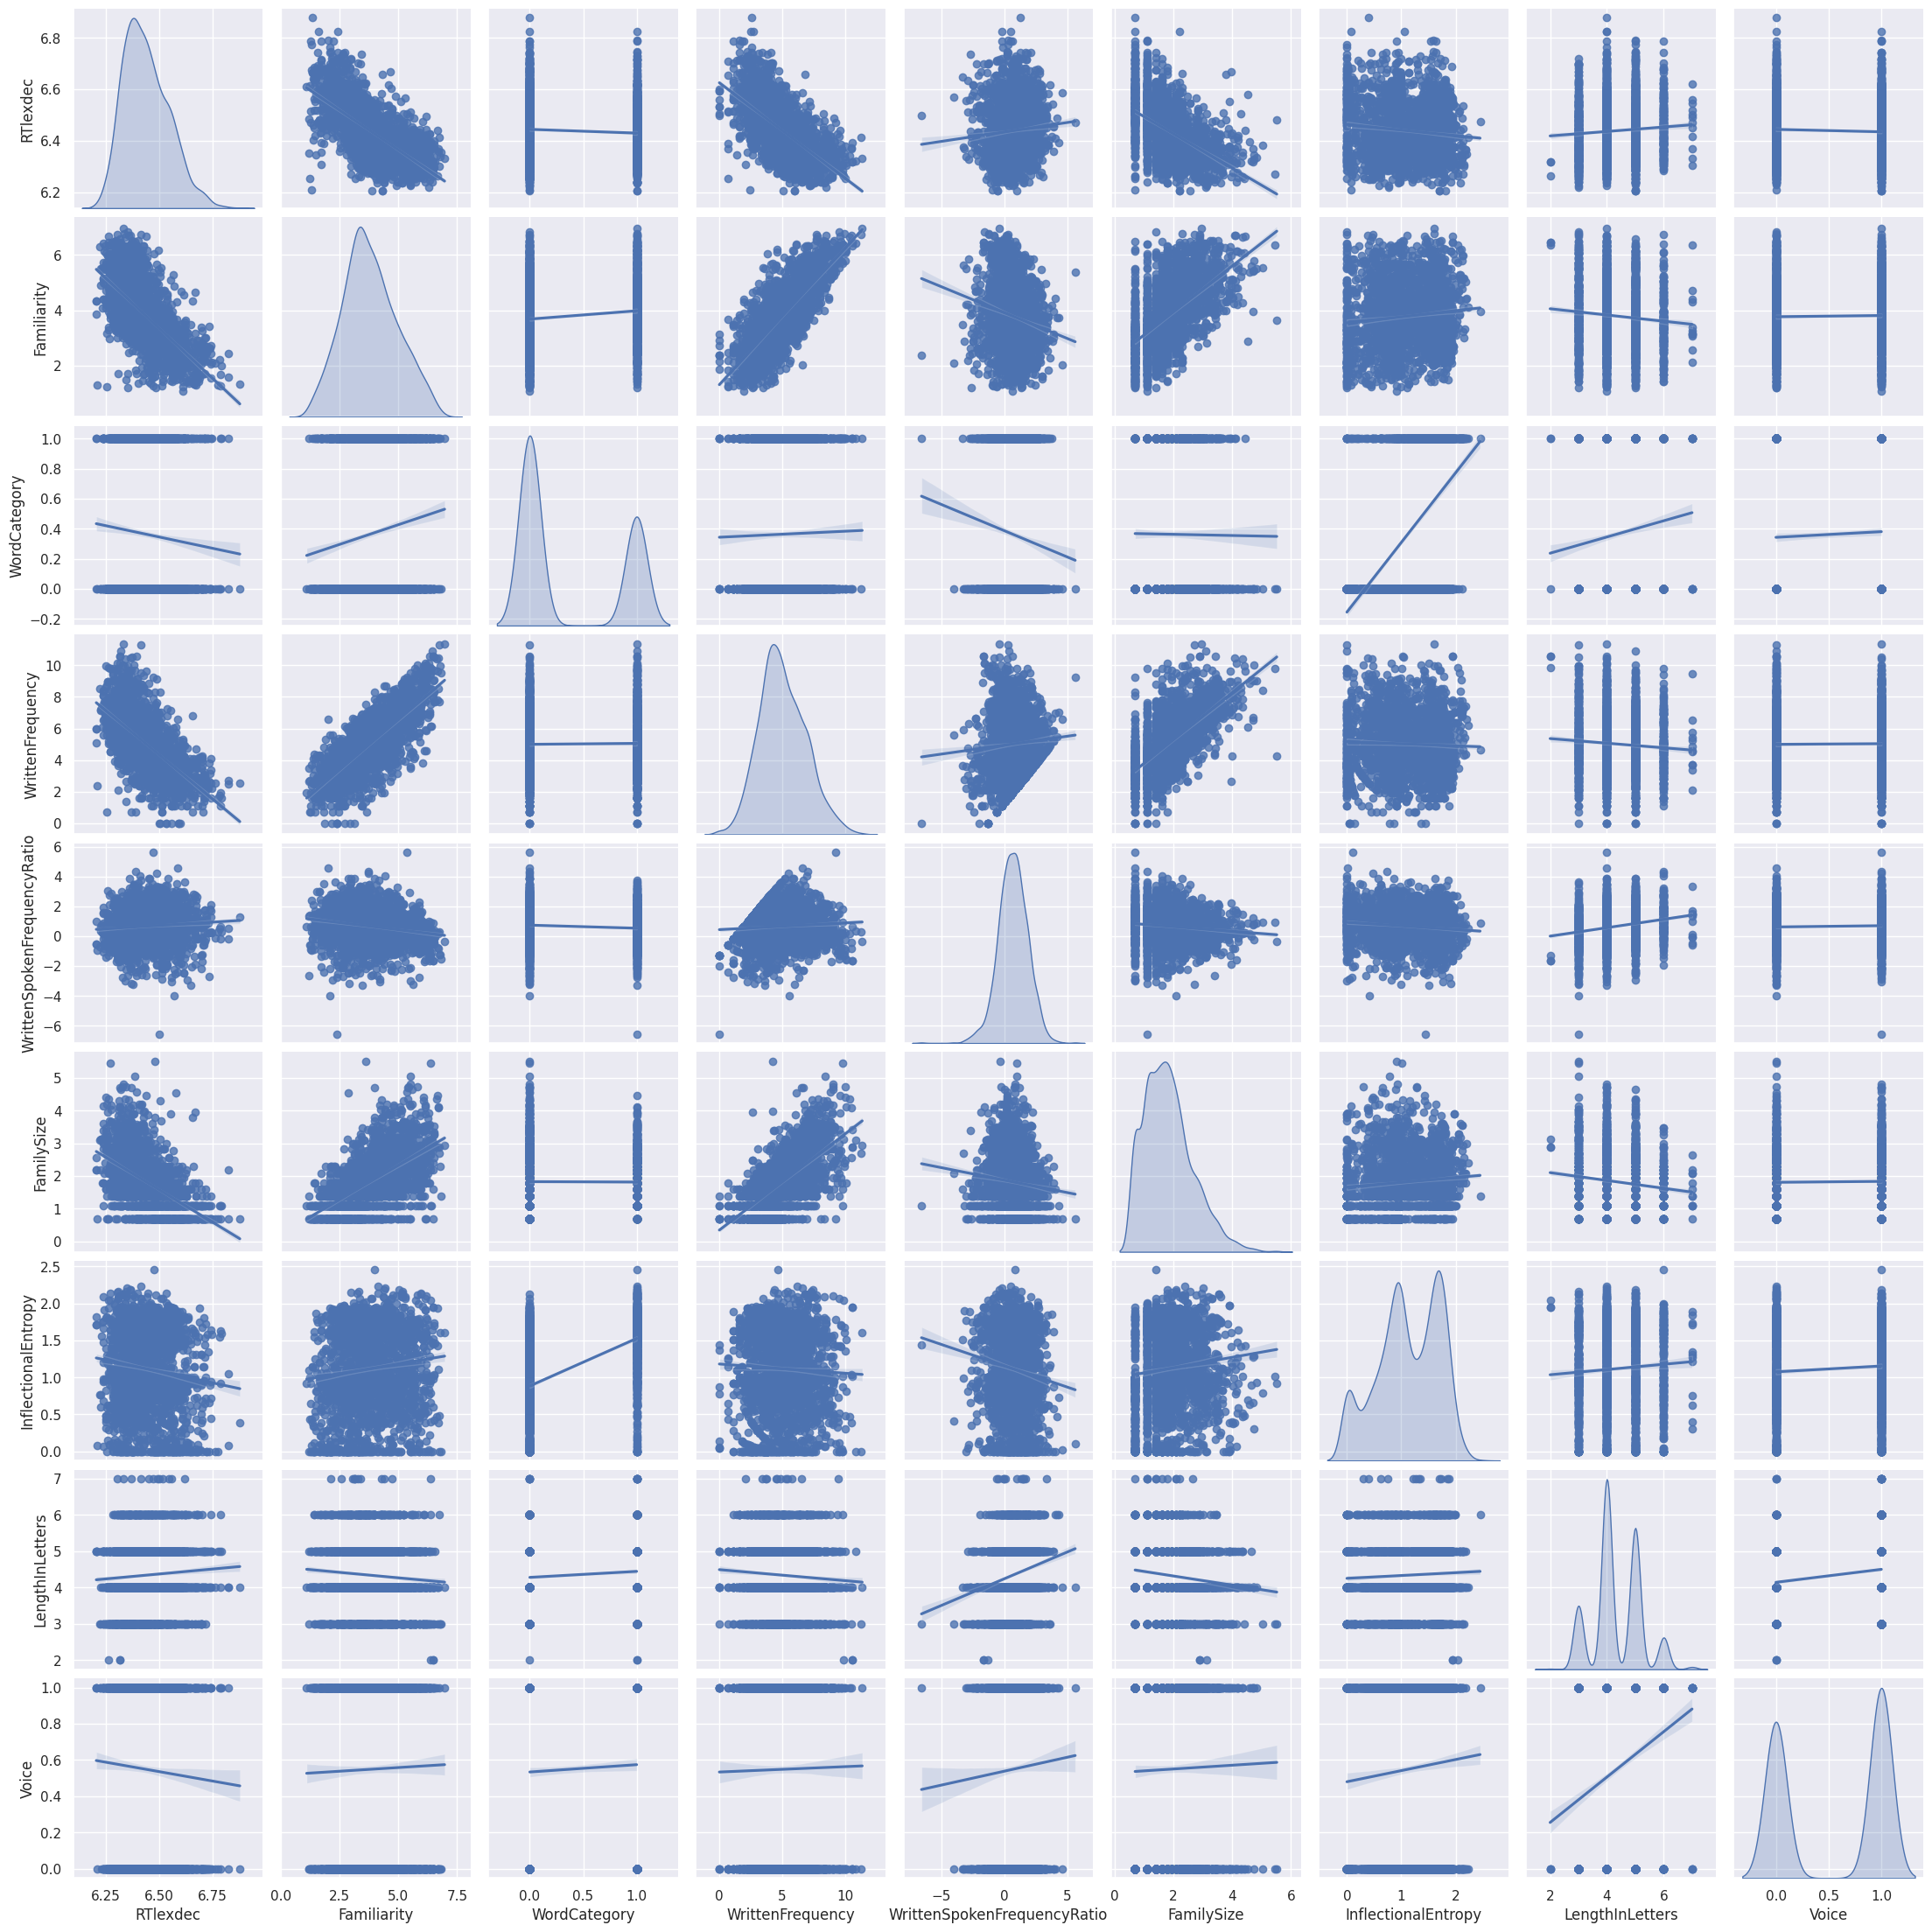

In [71]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

## kind = 'reg': add linear trend lines
## diag_kind = 'kde' : show density plots for each predictor in diagonal panels.
sns.pairplot(english_young, kind = 'reg', diag_kind='kde')

## Question 6 (4 points)

Let's examine the relationship between the written frequency of a word and its
lexical decision time.  

When examining relationships between two variables, especially when we're not sure if they're linear, it's useful to look at a *locally-smoothed regression line* that relates the $x$ and $y$ axes of a plot. This is a kind of regression model where the function is refit localy for many subsets of the data then a smooth line is interpolated between these points. One standard technique for this is known as *locally weighted scatterplot smoothing* or [LOWESS](https://en.wikipedia.org/wiki/Local_regression).

When examining large datasets like this one, it's important to format how the data is displayed so that both the empirical distribution of data and the fitted trend  (here, linear or LOWESS line) are legible, meaning:
* Points should not overlap too much
* Neither points nor the trend is formatted such that the other is obscured.

Other desiderata for any plot are:
* x and y axes should be clearly labeled (with interpretable labels, not variable names like `RTlexdec`)
* Text should be legible: appropriately-sized fonts, no overlapping text.

Use functions from matplotlib and seaborn to make **legible** plots meeting the specifications above:

* Make a 1 x 2 grid of plots
* In the left plot, put a scatterplot of written frequency (x-axis) and lexical decision RT (y-axis), with a superimposed linear trend (line of best fit).  
* In the right plot, put a scatterplot of written frequency (x-axis) and lexical decision RT (y-axis), with a superimposed LOESS of best fit.
* In both plots: adjust the size, transparency, and/or color of the lines and/or dots as appropriate.

You may find the Seaborne help pages useful, such as [this one](https://seaborn.pydata.org/tutorial/regression.html).  Some possible functions to use:

* `plt` and `plt.subplots` from `matplotlib.pyplot`
* `regplot` from `seaborn`

**See 'Visualization' in the 'Regression' Colab Notebook (used in class, and found under MyCourses -> Content -> Code workbooks) for an example of code that creates legible plots. <font color='red'>Points will be deducted for plots that are not sufficiently legible as per the details mentioned above.</font>**





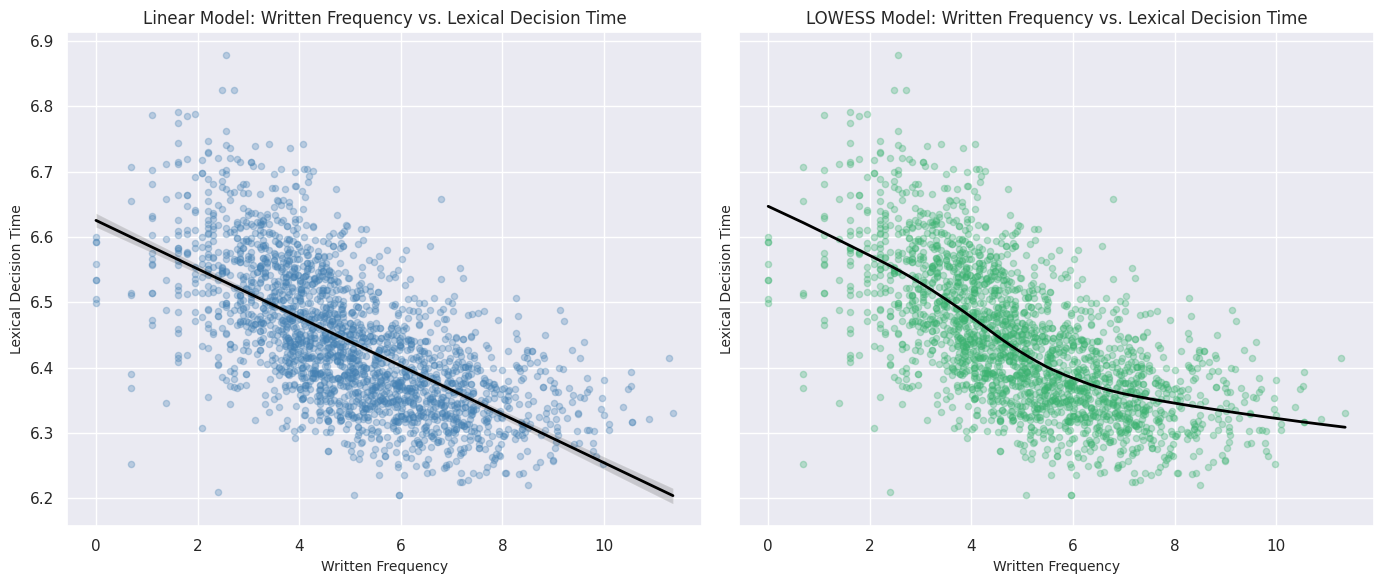

In [72]:
# Question 6:

fig, subplot_array = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Figure 1
sns.regplot(
    ax=subplot_array[0],
    x='WrittenFrequency',
    y='RTlexdec',
    data=english_young,
    scatter_kws={'alpha': 0.3, 's': 20, 'color': 'steelblue'},
    line_kws={'color': 'black', 'linewidth': 2}
)
subplot_array[0].set_title("Linear Model: Written Frequency vs. Lexical Decision Time", fontsize=12)
subplot_array[0].set_xlabel("Written Frequency", fontsize=10)
subplot_array[0].set_ylabel("Lexical Decision Time", fontsize=10)

# Figure 2
sns.regplot(
    ax=subplot_array[1],
    x='WrittenFrequency',
    y='RTlexdec',
    data=english_young,
    lowess=True,
    scatter_kws={'alpha': 0.3, 's': 20, 'color': 'mediumseagreen'},
    line_kws={'color': 'black', 'linewidth': 2}
)
subplot_array[1].set_title("LOWESS Model: Written Frequency vs. Lexical Decision Time", fontsize=12)
subplot_array[1].set_xlabel("Written Frequency", fontsize=10)
subplot_array[1].set_ylabel("Lexical Decision Time", fontsize=10)

plt.tight_layout()
plt.show()


## Question 7 (2 points)

Based on these two plots, do you think that a linear model represents the relationship between written frequency and reaction time?  Why/why not? If we fit a polynomial approximation of order $k$ to the LOESS curve, what $k$ do you think would be most appropriate? You can specify up to two possible $k$ values (e.g. "k = 3" or "$k =$ 1--2" is OK, "$k =$ 3, 5 or 9" is not).  Your answer should be verbal, with your guess at $k$ purely based on visual inspection. See 'Polynomial Regression' in the Regression Colab Notebook (MyCourses -> Content -> Code workbooks) to see what different $k$ values look like.

NB: A line is a polynomial.



**Q7: put your answer here (2-3 sentences max)**
> The LOWESS model shows that the relationship isn't perfectly straight. There is a slight curvature in lower frequencies, especially between Written Frequency 2 and 6. Therefore, k values 2 or 3 would be more fitting for the model since they would reflect the observed nonlinearity and slight curvature.

## Question 8 (2 points)

When modeling any relationship in data, it's important to think not just about what quantitative model (e.g. a line vs. a LOWESS curve) fits best, but what  relationships are possible given domain-specific knowledge.

Let's consider the linear fit from this perspective.  Think about what a linear fit predicts for reaction time as written frequency is changed, and what people are doing in a lexical decision task. Is there any issue (or multiple issues) that tells us that the true relationship cannot be linear? Explain.

**Q8: put your answer here (2-3 sentences max)**
> A linear fit would suggest that the reaction speed would decrease at a constant rate as written frequency increases. However, there is a physiological limit to human reaction speed — the average reaction time is around 250 milliseconds, since recognizing and processing a word involves visual and cognitive processing from the eyes to the brain, Therefore, the true relationship should be nonlinear with a curved flattening at higher frequencies since it corresponds to diminishing returns.





# Question 9 (2 points), Question 10 (6 points)

We'll now check your intuition from above by examining more complex models of the relationship between frequency and lexical decision time, similarly to cases in the Regression CoLab notebook considered in class.

Fill in the following code for fitting polynomial regressions of degree $k$, choosing the best $k$, and visualizing the resulting relationship.

The one difference from the code considered in class is that we will consider two measures of goodness of fit:

1. $R^2$ on the test set
2. Bayesian Information Criterion (BIC) on the test set

Note that as defined here, **lower** BIC = better model (lower value, not lower absolute value; a BIC of -1500 is lower than a BIC of -1000).

*Hint*: Do not implement your own function for train/test splitting, or for computing polynomial components.


In [73]:
# Importing necessary libraries and defining BIC function:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import random
np.random.seed(42)
random.seed(42)

def bic(X, y, degree, model):
  # number of observations
  n = X.shape[0]

  # number of parameters
  k = degree + 1

  # calculate Residual Sum of Squares)
  RSS = mean_squared_error(y, model.predict(X)) * n

  BIC = n * np.log(RSS / n) + k * np.log(n)

  return(BIC)


In [74]:
# Question 9: Preprocessing

# starting from english_young:

# - Set up a predictor matrix X for features -- considering just the written frequency feature
X = english_young[['WrittenFrequency']]

# - Set up the outcome vector, y.
y = english_young['RTlexdec']

# - Split the data into train and test subsets, with 20% of the data in test.
# This should define objects called X_train, X_test, y_train, and y_test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model class: Linear Regression
	Degree 1
		Train R^2: 0.43170183394771244
		Test R^2: 0.34017204076755403
		BIC: -2238.0973155774836
	Degree 2
		Train R^2: 0.4544101475799237
		Test R^2: 0.3383443008735334
		BIC: -2230.7084808535014
	Degree 3
		Train R^2: 0.4706396456521179
		Test R^2: 0.358247345057783
		BIC: -2238.541661425749
	Degree 4
		Train R^2: 0.47883643586901936
		Test R^2: 0.3685663572489709
		BIC: -2239.8249934091828
	Degree 5
		Train R^2: 0.47884757551731016
		Test R^2: 0.36852213790189103
		BIC: -2233.668307393328
	Degree 6
		Train R^2: 0.47963757434437126
		Test R^2: 0.371315648066495
		BIC: -2229.5697698782615
	Degree 7
		Train R^2: 0.4796721211551489
		Test R^2: 0.3717878525391659
		BIC: -2223.788467910209
	Degree 10
		Train R^2: 0.47989243058396436
		Test R^2: 0.37425500419375934
		BIC: -2207.2127084798417
	Degree 25
		Train R^2: 0.21147642943570277
		Test R^2: 0.1677454721876207
		BIC: -1985.0081672557747


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist

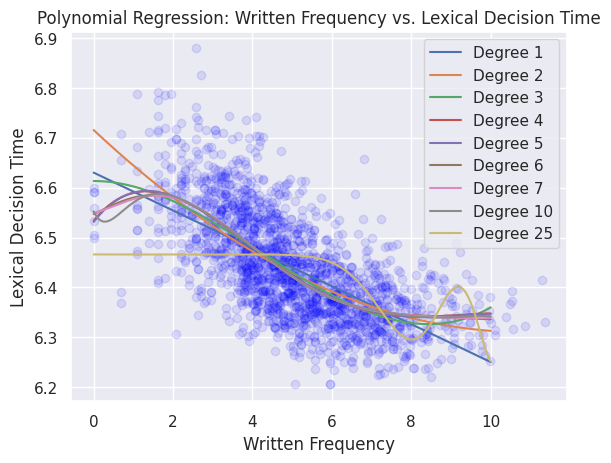

In [75]:
## Question 10: polynomial regression + visualization

######
# Sets up a scatterplot of training data:
X_plot = np.linspace(0, 10,5000).reshape(-1, 1)
plt.scatter(X_train, y_train, color='blue', alpha=0.1)

######
print("Model class: " + "Linear Regression")
for degree in [1,2,3,4,5,6,7,10,25]:
  # - fit a polynomial regression model with this degree, on the training data
  # it should be named 'model'.
  model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
  model.fit(X_train, y_train)

  print("\tDegree " + str(degree) +"\n\t\tTrain R^2: "+ str(model.score(X_train,y_train)))
  print("\t\tTest R^2: "+ str(model.score(X_test,y_test)))
  print("\t\tBIC: "+ str(bic(X_test, y_test, degree, model)))


  # Add a line to the plot for this model, showing predictions for the test data.
  y_plot = model.predict(X_plot)
  plt.plot(X_plot, y_plot, label=f"Degree {degree}")

  # Note: your plots will be messy and unintuitive if you don't make sure to sort the vectors you provide to the plotting function.
  #       Make sure to sort your X_test vector before passing it to the model, and then plotting the predictions.

plt.xlabel("Written Frequency")
plt.ylabel("Lexical Decision Time")
plt.title("Polynomial Regression: Written Frequency vs. Lexical Decision Time")
plt.legend()
plt.show()


## Question 11 (3 points)

Which degree polynomial provided the best fit to this dataset based on $R^2$?  Based on BIC?  Which answer makes more sense given your answers to Questions 7 and 8?  Is the relationship between frequency and lexical decision time linear or nonlinear?

**Q11: put your answer here (3 sentences max)**
> Degree 10 is the best fit based on R^2 with the highest value 0.47989243058396436 while Degree 4 is the best fit based on BIC with the lowest value -2239.8249934091828. Given my responses to previous answers, Degree 4 makes more sense since the curve has both a nonlinear and smooth shape. Therefore, the relationship between frequency and lexical decision time is nonlinear.

## Question 12 (4 points)


Let's now fit a model using all predictors, including a polynomial effect of `WrittenFrequency`, of the degree you chose in Question 11.

For interpreting the model coefficients, it's useful to first standardize both $y$ and the columns of X.  

Prepare the data for this model:

*Hint*: Do not implement your own function for z-scoring each column of a DataFrame.



In [76]:
# Question 12
np.random.seed(42)
random.seed(42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## define X such that the columns are predictor variables in english_young,
## with columns added for polynomial features.
##
## for example, if you found in Question 6 that k = 4, then you'd add a
## columns here called WrittenFrequency2, which is the square of the WrittenFrequency column,
## and similarly for WrittenFrequency3 and WrittenFrequency4

feature_names = [
    'Familiarity', 'WordCategory', 'WrittenSpokenFrequencyRatio', 'FamilySize',
    'InflectionalEntropy', 'LengthInLetters', 'Voice'
]

polynomial = PolynomialFeatures(degree=4, include_bias=False)
X_frequency = polynomial.fit_transform(english_young[['WrittenFrequency']])
frequent_polynomials = polynomial.get_feature_names_out(['WrittenFrequency'])

X = pd.concat([pd.DataFrame(X_frequency, columns=frequent_polynomials), english_young[feature_names].reset_index(drop=True)], axis=1)

## Now: define X_std and Y_std:

## - X_std is the X matrix above, but with each column z-scored
X_std = StandardScaler().fit_transform(X)

## - y_std is the same as y above, but z-scored
y_std = StandardScaler().fit_transform(english_young['RTlexdec'].values.reshape(-1, 1))

# - Split the z-scored data into train and test subsets, with 20% of the data in test.
# This should define objects called X_std_train, X_std_test, y_std_train, and y_std_test.

X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X_std, y_std, test_size=0.2, random_state=42)

# Question 13 (3 points)

There are many predictors here, some of which probably don't actually have non-zero effects.  We'll fit a Lasso regression, which should perform as well as linear regression, while allowing us to perform variable selection.  

In [77]:
## Question 13
from sklearn.linear_model import Lasso

np.random.seed(42)
random.seed(42)

# Fit a Lasso linear regression to X_std_train and y_std_train (which correspond to the train split of the X_std and y_std data), with alpha parameter of 0.02.
# (you can just assume this is a good alpha).  Call this model mod_lasso.

mod_lasso = Lasso(alpha=0.02, max_iter=10000)
mod_lasso.fit(X_std_train, y_std_train.ravel())


# Print the R^2 of this model on the train and test set
print("R^2 of train set:", mod_lasso.score(X_std_train, y_std_train))
print("R^2 of test set:", mod_lasso.score(X_std_test, y_std_test))


R^2 of train set: 0.5431160662227933
R^2 of test set: 0.4364878416091771


## Question 14 (3 points)

Print out a pandas DataFrame summarizing the coefficient value for each predictor for this model, called `coefficients_with_features`. Column 1 should be predictor names and Column 2 coefficient values.  The rows of the table should be sorted in order of coefficient magnitudes (= absolute values).

In [78]:
## Question 14

# extract model coeffs
coefficient = mod_lasso.coef_
feature = X.columns

# make the dataframe
coefficients_with_features = pd.DataFrame({'feature': feature, 'coefficient': coefficient})

# sort the DataFrame by coefficient magnitude
coefficients_with_features = coefficients_with_features.reindex(coefficients_with_features['coefficient'].abs().sort_values(ascending=False).index)

print(coefficients_with_features)

                        feature  coefficient
0              WrittenFrequency    -0.480165
4                   Familiarity    -0.374975
3            WrittenFrequency^4     0.232732
7                    FamilySize    -0.096298
8           InflectionalEntropy    -0.047868
6   WrittenSpokenFrequencyRatio     0.023384
10                        Voice    -0.004649
2            WrittenFrequency^3     0.000000
1            WrittenFrequency^2    -0.000000
5                  WordCategory     0.000000
9               LengthInLetters     0.000000


## Question 15 (2 points)

According to the Lasso regression:
* Which two predictors have the largest effects?
* Which predictors are selected as having no effect?



**Q15: put your answer here (2 sentences max)**
> According to the Lasso regression, WrittenFrequency and Familiarity have the largest affects. WrittenFrequency^3, WrittenFrequency^2, WordCategory, and LengthInLetters are chosen as having no effect.

## Question 16 (3 points)

You should find that two of the predictors that have large effects are very correlated (see the empirical plot above, between Question 5 and 6). Call these $x_1$ and $x_2$.  What are $x_1$ and $x_2$? (Choose the most-correlated pair of predictors.)

Suppose that in reality, only $x_1$ (causally) affects `RTlexdec`, and $x_2$ just looks correlated with `RTlexdec` because it's highly correlated with $x_1$. Why hasn't Lasso selected $x_2$ as having no effect (and will not do so, even if we increase `alpha`)?

**Q16: put your answer here (3-4 sentences max)**
> x1 and x2 are WrittenFrequency and Familiarity respectively as shown in the previous scatterplot. If only WrittenFrequency causally affects RTlexdec and Familiarity is just correlated with RTlexdec, Lasso still assigns Familiarity a high coefficient because it can't differentiate between two highly correlated predictors. Even if alpha is increased, unless one is more predictive when the other is excluded, Lasso will keep both.

## Question 17 (3 points)

* Why is $R^2$ on the test set lower than on the training set?
* If the `alpha` parameter were increased, would we expect the $R^2$ on the test set to increase or decrease? Do we expect more or fewer predictors to be selected as having no effect? Explain.


**Q17: put your answer here (3 sentences max)**
> R^2 on the test set is lower than on the training set since model is evaluated on unseen data and overfitting is minimized. If we increase the alpha value, we would expect the R^2 to decrease due to underfits. More predictors will be selected as having no affect since a greater alpha causes greater sparsity.

# Part 2: Classification with Pokémon data

This part uses Pokémon name data to examine sound symbolism: to what extent are properties of a Pokémon predictable from its name?  We will be considering *evolution*, a fundamental division between Pokémon characters.  For our purposes, Pokémon can be either *evolved* or *non-*evolved. (The real story is [more complicated](https://bulbapedia.bulbagarden.net/wiki/Evolution), as many of you know, but this is a reasonable first approximation.)

 An interesting aspect of Pokémon for linguistic research is that complete Pokémon name sets exist in different languages, giving us multiple datasets to examine sound symbolism and to what extent it looks similar across languages.

In class we examined Pokémon evolution status as a classification problem for English names .  In this homework, we'll do the same for Mandarin Chinese names (henceforth "Mandarin").

This data comes from a recent paper:

Kilpatrick, A., Ćwiek, A., and Kawahara, S. (2023). [Random forests, sound symbolism and Pokémon evolution](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0279350).
PLoS ONE 18(1): e0279350. https://doi.org/10.1371/journal.pone.0279350

This paper considers Korean, Japanese, and Mandarin datasets, all available in this [OSF project](https://osf.io/pe24w/?view_only=02e9327a7bd54b9280b57434a90ed83a).  

The datafile we are using, `chinese_pokemon.csv`, is derived from the data on this site.

Copy the data to your Drive folder from [here](https://drive.google.com/file/d/1jA5M38-v7gNzQbacihnp7aItAycM_89p/view?usp=sharing).


In [79]:
# throws an error if your Drive folder doesn't contain chinese_pokemon.csv
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/chinese_pokemon.csv"


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
'/content/drive/My Drive/chinese_pokemon.csv'


First, load the data and take a look:

In [80]:
chinese = pd.read_csv("/content/drive/My Drive/chinese_pokemon.csv")
display(chinese)

name  length  evolved  flat_tone  rising_tone  \
0     miàowāZǒNzǐ      11        0          1            0   
1       miàowācǎo       9        1          1            0   
2       miàowāhuā       9        1          2            0   
3      xiǎohuǒlóN      10        0          0            1   
4       huǒkǒNlóN       9        1          0            1   
..            ...     ...      ...        ...          ...   
893  léijíHàilèqí      12        0          0            3   
894  léijíduólāgē      12        0          2            3   
895      xuěbàomǎ       8        0          0            0   
896      líNyōumǎ       8        0          1            1   
897    lěiguànwáN      10        0          0            1   

     falling_rising_tone  falling_tone  neutral_tone  a  e  ...  r  x  h  l  \
0                      2             1             2  2  0  ...  0  0  0  0   
1                      1             1             3  3  0  ...  0  0  0  0   
2                      0             1             3  3  0  ...  0  0  1  0   
3                      2             0             3  1  0  ...  0  1  1  1   
4                      2             0             1  0  0  ...  0  0  1  1   
..                   ...           ...           ... .. ..  ... .. .. .. ..   
893                    0             2             2  1  2  ...  0  0  0  2   
894                    0             0             2  1  2  ...  0  0  0  2   
895                    2             1             2  2  1  ...  0  1  0  0   
896                    1             0             1  1  0  ...  0  0  0  1   
897                    1             1             2  2  1  ...  0  0  0  1   

     w  q  y  H  hyphen  colon  
0    1  0  0  0       0      0  
1    1  0  0  0       0      0  
2    1  0  0  0       0      0  
3    0  0  0  0       0      0  
4    0  0  0  0       0      0  
..  .. .. .. ..     ...    ...  
893  0  1  0  1       0      0  
894  0  0  0  0       0      0  
895  0  0  0  0       0      0  
896  0  0  1  0       0      0  
897  1  0  0  0       0      0  

[898 rows x 41 columns]

Column meanings:

* `name`: Pokémon's name, in a custom transcription system$^{*}$
* `length`: length of name, in phones
* `evolved`: evolved Pokémon? 0/1 = False/True
* `flat_tone`, `rising_tone`, etc.: number of syllables in the name carrying this tone
* `a`, `i`, `e`, etc: number of times this phone appears in the name

The transcription system used is close to [Pinyin](https://en.wikipedia.org/wiki/Pinyin), but modified so that every phoneme is represented by a single ASCII character---similar to the X-SAMPA system for English used in our `h95.csv` vowels dataset.  (If you are curious / familiar with Mandarin, the system is described on p. 5 of [this document](https://osf.io/32whg?view_only=02e9327a7bd54b9280b57434a90ed83a).)  Some things you may need to know for this homework are:

* Every syllable in Mandarin bears one of 5 tones: flat, rising, falling-rising, falling, or neutral.
* `U` stands for a front rounded vowel (written "ü" in Pinyin)
* `N` stands for the velar nasal, which can only occur at the end of syllables in Mandarin (written "ng" in Pinyin).
* `j` stands for the affricate /tɕ/ (written "j" in Pinyin).
* `y` stands for the glide /j/ (written "y" in Pinyin).




## Question 18 (2 points)

Prepare the data:

* Make the predictor matrix: a numpy DataFrame `X` which consists of all columns except `name` and `evolved`.
* Make the outcome vector `y`
*  Split the data into train and test subsets, with 20% of the data in test. This should define objects called `X_train`, `X_test`, `y_train`, and `y_test`.


In [81]:
# Question 18
np.random.seed(42)
random.seed(42)

X = chinese.drop(columns=['name', 'evolved'])
y = chinese['evolved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We will fit two classification models to this dataset, with the goal of determining which predictors (properties of a Pokémon's name) affect `evolution`.  

Some background on sound symbolism will be useful.  We might hypothesize that "evolved" status would be correlated with some types of sounds which have been found to evoke large size/heaviness/hardness across languages:

* Low vowels, such as `a`: positive correlation
* High vowels, such as `i`: negative correlation
* Back vowels, such as `u`: negative correlation
* Nasal consonants, especially in syllable codas: positive correlation
* Bilabial consonants: negative correlation

One theory underlying such associations is Ohala's *frequency code hypothesis*, which posits that sounds that tend to have higher f0 (pitch) are more associated with greater size/weight/male gender.  

For Pokémon names, it is well known (by players) that:

*  *longer names* are positively correlated with "evolved" status (as well as higher power).  

This pattern seems to be Pokémon-specific sound symbolism.

Interestingly, not much is known about sound symbolism involving tones across languages, including in Mandarin Chinese (the world's most-spoken tone language).

## Question 19 (3 points)

We will first fit and evaluate a logistic regression model to predict `evolved`.  


In [82]:
# Problem 12

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fit a logistic regression model, called lr_model, to X_train and y_train.
# Make sure that the model does not use any regularization -- the
# sklearn default includes L2 regularization.
lr_model = LogisticRegression(C=1e10, solver='liblinear', max_iter=1000)
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)


# Calculate the accuracy on the training set and on the test set.
# save these as train_acc and test_acc

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# print these accuracies:
print([train_acc, test_acc])

[0.6183844011142061, 0.6111111111111112]


## Question 20 (3 points)

To examine which predictors are important, print a table of coefficients where:
* Each row corresponds to one predictor
* Column 1: predictor names
* Column 2: coeficient values
* Rows sorted by decreasing coefficient _absolute value_.

Fill in the missing parts of code below.

In [83]:
## Question 20

# make 'feature_names' the names of columns of X_train
feature_names = X_train.columns

# make 'coefficients' a numpy array consisting of the values of the coefficients of lr_model
coefficients = lr_model.coef_[0]

#  Make a DataFrame:
coef_table = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# sort the Dataframe by absolute value of coefficients, then print it.
coef_table = coef_table.sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_table)

                Feature  Coefficient
37               hyphen     8.221043
38                colon    -7.812662
25                    j     0.902975
14                    N     0.810152
31                    h     0.764084
11                    U    -0.761666
23                    z     0.682468
26                    f     0.671414
33                    w     0.656886
24                    Z     0.620944
22                    C     0.582275
28                    S     0.560604
18                    b     0.551198
17                    k     0.542846
13                    n     0.538032
19                    d     0.527972
36                    H     0.473688
20                    g     0.432994
21                    c     0.432898
32                    l     0.428051
12                    m     0.364028
35                    y     0.361872
10                    u     0.289642
4          falling_tone     0.242827
6                     a     0.222586
7                     e     0.207861
3

## Question 21 (2 points)

What are the four most important features, going by coefficient values?  Briefly describe what they mean (e.g. `a` would be "number of times 'a' appears in the name").

**Q21: put your answer here, with each feature one line of an itemized list. (4 sentences)**


> 1.   hyphen: Number of hypens in the Pokemon name, usually more hyphens indicating a more evolved Pokemon.
2.   colon: Number of colons in the name, usually more colons indicating a less evolved status.
3.   j: Number of times affricate /tɕ/ (written "j" in Pinyin) appears in the name positively correlated with evolved status.
3.   N: Number of times velar nasal, which can only occur at the end of syllables in Mandarin (written "ng" in Pinyin) appears in the name positively correlated with evolved status.




## Question 22 (3 points)

Our second model will be a random forest. Fit a random forest called `rf` to the training data, with the following options:

* Minimum number of samples per split: 5
* Maximum tree depth: 5
* Use OOB score instead of accuracy
* Use 1000 trees

(These options make this particular random forest perform better, and you can just take them as given.)

Then print its accuracy on the train and test set.

In [84]:
## Question 22
np.random.seed(42)
random.seed(42)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=1000,
    min_samples_split=5,
    max_depth=5,
    oob_score=True,
    random_state=42
)
rf.fit(X_train, y_train)

train_acc_rf = accuracy_score(y_train, rf.predict(X_train))
test_acc_rf = accuracy_score(y_test, rf.predict(X_test))
print("Train accuracy:", train_acc_rf)
print("Test accuracy:", test_acc_rf)
print("OOB score:", rf.oob_score_)


Train accuracy: 0.7799442896935933
Test accuracy: 0.5944444444444444
OOB score: 0.5348189415041783


To compute feature importances for this random forest, we'll work from [this sklearn vignette](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html).

We will compute *permutation importance* on a held-out test set, as in the example shown after the paragraph beginning with "As an alternative, the permutation importances of rf are computed on a held out test set..." Read as much of the vignette as necessary to understand what is being done here, and what the boxplots in the following plot mean. (Why does the figure show a range of values for each feature, rather than just a single importance number?)

We adapt the code there to calculate permutation importance and show a plot of horizontal boxplots, like the one shown there:

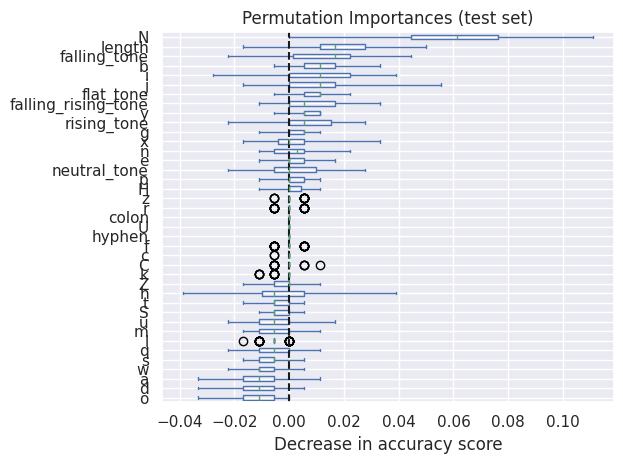

In [85]:
from sklearn.inspection import permutation_importance

# This code will work after you've defined rf, but will take a while to run

## calculate permutation importance
result = permutation_importance(
    rf, X_test, y_test, n_repeats=50, random_state=42, n_jobs=-1
)

## arrange as a dataframe, sorted by importance
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

# plot importances on the test set
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

## Question 23 (2 points)

What are the four most important features, going by this plot?  How much do these features overlap with those from Question 21?


**Q23: put your answer here (3 sentences max)**
> According to the figure, most important figures are N, length, falling_tone, and, b. N and length were also in the top features in Question 21, so there is a partial overlap. This overlap suggests that these 2 features are predictive in both linear and nonlinear models while b and falling_tone is more predictive in random forest model.

## Question 24 (4 points, up to 4 points extra credit)

To get a sense of how each of these features affects `evolved`: for each feature, make four empirical plots: one for each feature, with the feature on the x-axis and % evolved on the y-axis.  These plots should be in a 1x4 grid.

Each plot can just show one point per value of the feature, corresponding to the % of the data with this feature value (e.g. `a` = 2) for which `evolved` is 1.  

Your plots should be **legible**, following the guidelines in Question 6, though it's not required to show the empirical data in the plots.

*Extra credit*: calculate the error for each % evolved, and showing these on the plots (using 95% confidence intervals).  Add information to the plot showing the empirical data: the number of points with `evolved` = 1 vs. 0 for each feature value. Just using a default scatterplot isn't informative (why?).

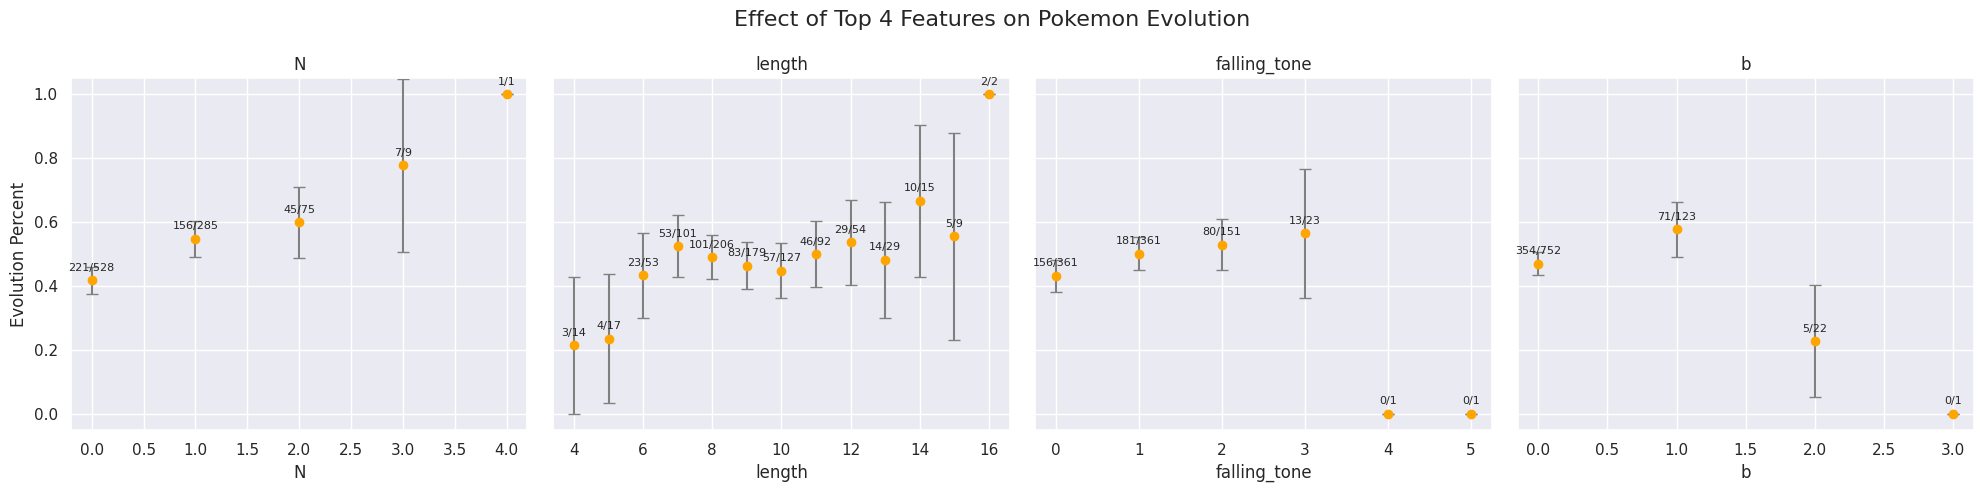

In [93]:
# Question 24

top_four_features = ['N', 'length', 'falling_tone', 'b']

figure, subplot_array = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i, feature in enumerate(top_four_features):
    grouped = chinese.groupby(feature)['evolved']

    evolution_percent = grouped.mean()
    count = grouped.count()
    std_error = (evolution_percent * (1 - evolution_percent) / count) ** 0.5

    subplot_array[i].errorbar(
        evolution_percent.index,
        evolution_percent.values,
        yerr=(1.96 * std_error),
        fmt='o',
        ecolor='gray',
        capsize=4,
        color='orange'
    )

    for x, y in zip(evolution_percent.index, evolution_percent.values):
        total = grouped.get_group(x).shape[0]
        evolved = grouped.get_group(x).sum()
        subplot_array[i].text(x, y + 0.03, f"{int(evolved)}/{int(total)}", ha='center', fontsize=8)

    subplot_array[i].set_title(feature)
    subplot_array[i].set_xlabel(feature)
    if i == 0:
        subplot_array[i].set_ylabel('Evolution Percent')
    subplot_array[i].set_ylim(-0.05, 1.05)

figure.suptitle("Effect of Top 4 Features on Pokemon Evolution", fontsize=16)
figure.tight_layout()
plt.show()


## Question 25 (4 points)

Using your plots from Question 22 and the results of Question 23, discuss your findings from the random forest with respect to the sound symbolism background above (see Question 18).  Be sure to consider at least one feature you do _not_ find to be informative.

**Q25: put your answer here (3-4 sentences max)**
> Random forest model supports the hypothesis that prominence of nasal sound N and voiced bilabial b are positively associated with evolution. Length is informative in predicting evolution since evolved forms tend to have longer names. While hyphen and colon were informative in the regression model, they were found to be uninformative in the random forest model. The previous correlation in the regression model might be caused by overfitting.


## Question 26 (4 points)

Compare your findings from Part 2 (i.e. Questions 18-25) with the findings presented in class, from the Regression Colab Notebook (MyCourses -> Content -> Code workbooks). Did you find that similar features predict (i) `power` when using English names (this is what is covered in class, and in the Regression Colab Notebook); and (ii) `evolved` status when using Mandarin names (this is what is covered from Questions 18-25 of this assignment)? Mention any similarities and differences you find.

**Q25: Put your answer here (4 sentences max)**
> Both name length and nasal sounds like N are strong predictors indicating shared linguistic features across languages like Chinese and English. However, tone features specific to Mandarin played a role in evolution percentage detection while these weren't observed in English. On the other hand, vowel height plays a larger role in name prediction in English. These suggest a mix of universal symbolisms and unique language features are in effect to convey a meaning.

## Question 27 (Extra Credit: 6 points)

You should find that the most-informative features are quite different for the logistic regression and random forest models.  For the top two features listed as informative by the logistic regression model but not the RF model:

* Figure out why the LR but not the RF model has chosen them as informative.
* Explain why the RF model _doesn't_ choose them as informative.
* Explain why the RF's behavior is preferable.

A full answer will require writing both code and prose.


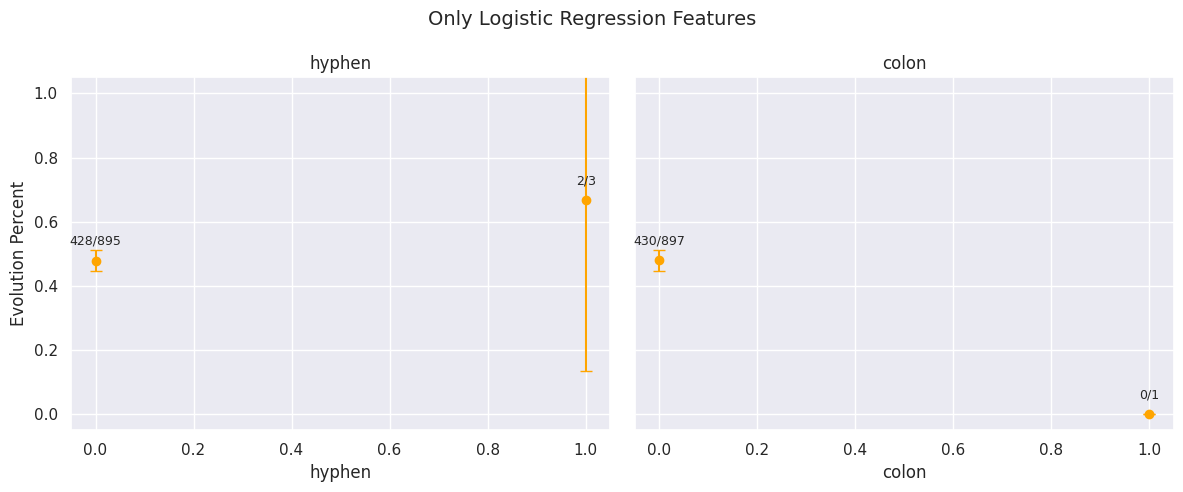

In [95]:
## Question 27

lr_only_features = ['hyphen', 'colon']

figure, subplot_array = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for i, feature in enumerate(lr_only_features):
    grouped = chinese.groupby(feature)['evolved']
    evolution_percent = grouped.mean()
    count = grouped.count()
    std_error = (evolution_percent * (1 - evolution_percent) / count) ** 0.5

    subplot_array[i].errorbar(
        evolution_percent.index,
        evolution_percent.values,
        yerr=(1.96 * std_error),
        fmt='o',
        color='orange',
        capsize=4
    )

    for x, y in zip(evolution_percent.index, evolution_percent.values):
        total = grouped.get_group(x).shape[0]
        evolved = grouped.get_group(x).sum()
        subplot_array[i].text(x, y + 0.05, f"{int(evolved)}/{int(total)}", ha='center', fontsize=9)

    subplot_array[i].set_title(feature)
    subplot_array[i].set_xlabel(feature)
    if i == 0:
        subplot_array[i].set_ylabel('Evolution Percent')
    subplot_array[i].set_ylim(-0.05, 1.05)

figure.suptitle("Only Logistic Regression Features", fontsize=14)
figure.tight_layout()
plt.show()

**Extra Credit: put your answer here**
> Hypen and colon corralte with evolved status on rare cases. However, this can be explained by noise rather than a pattern. LR model overfits the outliers while random forest correctly ignores them.

# To Submit
To submit:
* Name this notebook `YOUR_STUDENT_ID_Assignment_5.ipynb` and download it.
* Convert this `.ipynb` file to a `.pdf` (e.g., using the following instructions).  
* Upload the PDF to the Gradescope assignment "Assignment 5".
     * **<font color='red'>Make sure to match your answers to page numbers when submitting the PDF on Gradescope. Failure to do so will result in UP TO 10 POINTS BEING DEDUCTED.</font>**
* Submit the `.ipynb` file on myCourses under Assignment 5.

(Note: `Print > Save as PDF` **will not work** because it will not display your figures correctly.)

You can convert the notebook to a PDF using the following instructions.

# Converting this notebook to a PDF

1. Make sure you have renamed the notebook, e.g. `000000000_Assignment_5.ipynb` where `000000000` is your student ID.
2. Make sure to save the notebook (`ctrl/cmd + s`).

2. Make sure Google Drive is mounted (it likely already is from the first question).

In [96]:
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/Colab Notebooks/"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
 261138642_Assignment_5.ipynb
 261138642-W2025-Assignment-2-regular-expressions.pdf
'Assignment 1'
'Assignment-4: Language Modeling and Semantic Parsing.ipynb adlı not defterinin kopyası'
'NL2DS-W2025-Assignment-1.ipynb adlı not defterinin kopyası'
 NL2DS-W2025-Assignment-2-regular-expressions.html
 NL2DS-W2025-Assignment-2-regular-expressions.ipynb


3. Install packages for converting .ipynb to .pdf

In [97]:
!apt-get -q install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!apt-get install -y pandoc

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-latex-base texlive-latex-extra texlive-latex-recommended
  texlive-pictures tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibur-logkit-java liblog4

4. Convert to PDF (replace `000000000` with your student ID)

In [98]:
%env STUDENT_ID=261138642
!jupyter nbconvert --to pdf "/content/drive/My Drive/Colab Notebooks/${STUDENT_ID}_Assignment_5.ipynb"

env: STUDENT_ID=261138642
[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/261138642_Assignment_5.ipynb to pdf
[NbConvertApp] Support files will be in 261138642_Assignment_5_files/
[NbConvertApp] Making directory ./261138642_Assignment_5_files
[NbConvertApp] Writing 142163 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1472845 bytes to /content/drive/My Drive/Colab Notebooks/261138642_Assignment_5.pdf


5. Download the resulting PDF file. If you are using Chrome, you can do so by running the following code. On other browsers, you can download the PDF using the file mananger on the left of the screen (Navigate to the file > Right Click > Download).

In [99]:
import os
from google.colab import files
files.download(f"/content/drive/My Drive/Colab Notebooks/{os.environ['STUDENT_ID']}_Assignment_5.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6. Verify that your PDF correctly displays your figures and responses.

7. **<font color='red'>Remember to match your answers to page numbers when submitting the PDF on Gradescope!</font>**